<a href="https://colab.research.google.com/github/dcamcan1/MLA_DCC/blob/main/FinalProject_Classification_DCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Classification
## Danny Cannon
## CS-430-ON
## Machine Learning in the Cloud

## 1. Import for specific models

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Include imports for Voting, Bagging, Random Forest and AdaBoost classifiers.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Other Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Imports for Splitting Data and Building Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(display='diagram')

# Imports for Performance Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')


def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

In [31]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## 2. Acquire Data

In [32]:
wine_train = pd.read_csv('/content/gdrive/MyDrive/winequality-red.csv', sep=';')
wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wine_test = pd.read_csv('/content/gdrive/MyDrive/winequality-white.csv', sep=';')
wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3. Statistics and Visual Exploration

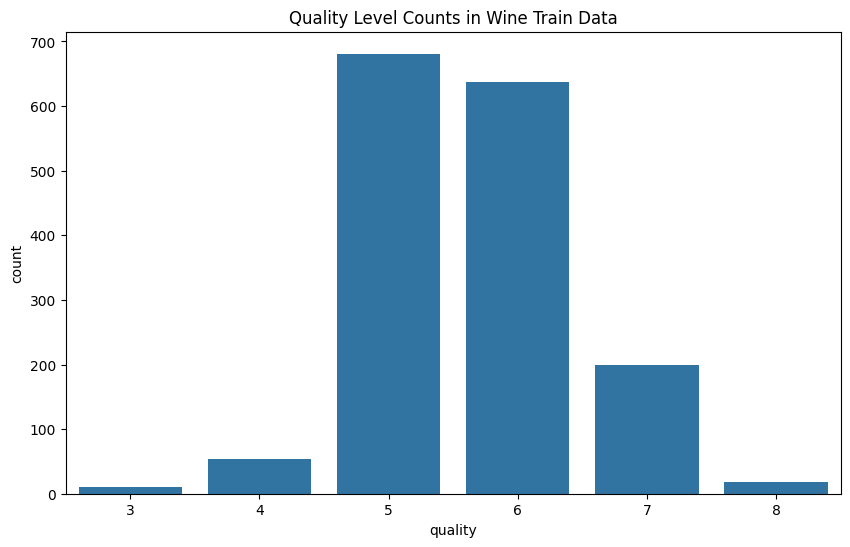

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_train, x='quality')
plt.title('Quality Level Counts in Wine Train Data')
plt.show()


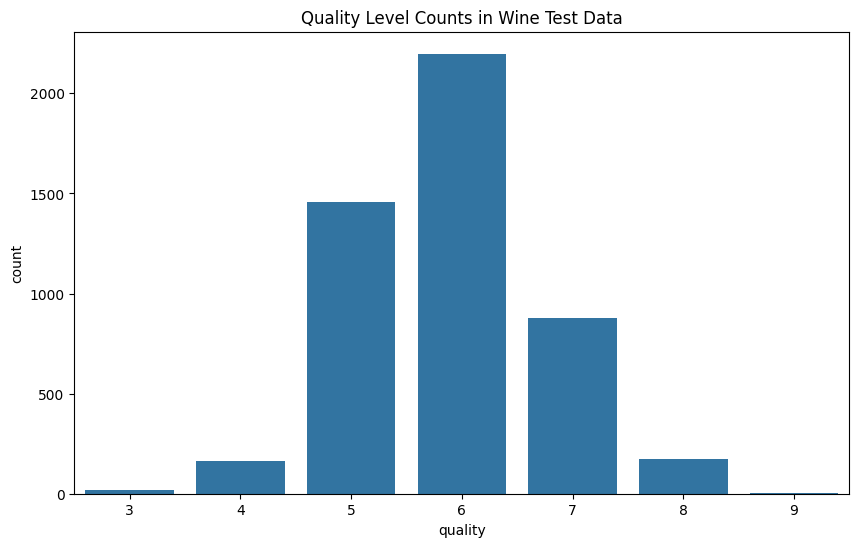

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_test, x='quality')
plt.title('Quality Level Counts in Wine Test Data')
plt.show()


## 4. Splitting Data into Train/Test

In [36]:
X_train = wine_train.drop('quality', axis=1)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [37]:
X_test = wine_test.drop('quality', axis=1)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [38]:
y_train = wine_train['quality']
y_train.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [39]:
y_test = wine_test['quality']
y_test.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

## 5. Building the Pipeline

In [105]:
num_attribs = X_train.select_dtypes(include=[np.number]).columns.tolist()

col_transform = ColumnTransformer([
    ('num', StandardScaler(), num_attribs)
])

In [106]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('model2', LogisticRegression(max_iter=1000)),
                     ])

set_config(display='diagram')
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('model2', LogisticRegression(max_iter=1000))])

In [107]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('model2', LogisticRegression(max_iter=1000))])

In [108]:
param_grid = {
    'trans__num__with_mean': [True, False],
    'trans__num__with_std': [True, False],
    'model2__C': [0.1, 1, 10],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'model2__C': 1, 'trans__num__with_mean': True, 'trans__num__with_std': False}


In [82]:
y_pred = pipeline2.predict(X_test)

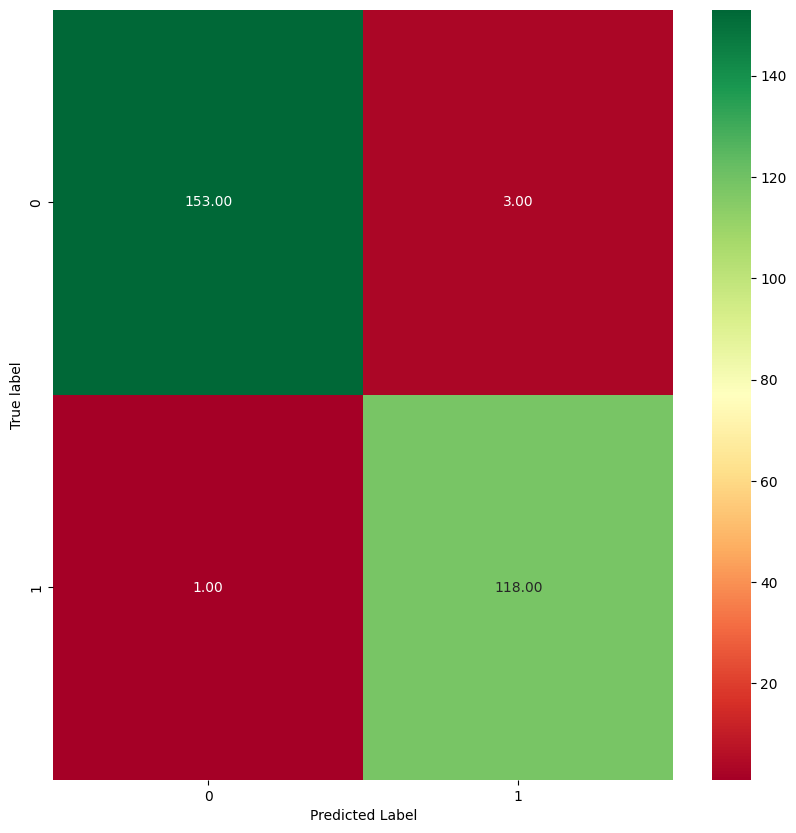

In [85]:
plot_cm(y_test,y_pred)

In [86]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9752066115702479
0.9915966386554622
0.9833333333333334


# The results are excellent

0.9995690583925878


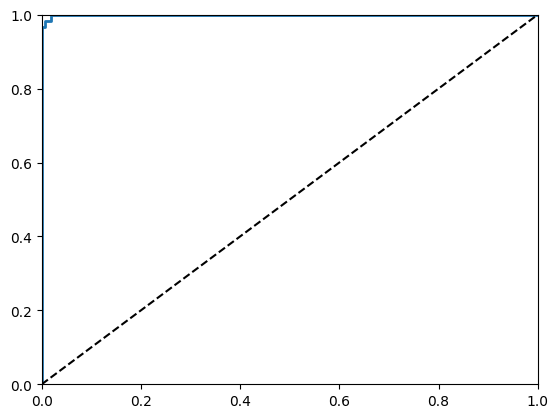

In [89]:
y_pred_proba = pipeline2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

# The ROC Curve indicates that the model has "excellent" performance
# ROC Curve is appropriate because it is a balanced data set

## 5. Building the Pipeline

In [69]:
num_attribs = X_train.select_dtypes(include=[np.number]).columns.tolist()

col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs)
])

In [74]:
random_forest = Pipeline([
    ('transform', col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

## 6. Executing the Model

In [75]:
# Run the pipeline to fit the RandomForestClassification model.
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf', RandomForestClassifier(n_estimators=1000))])

# 7. Evaluate the Model

In [76]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = random_forest.predict(X_test)

In [77]:
# Use the classification_function to display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



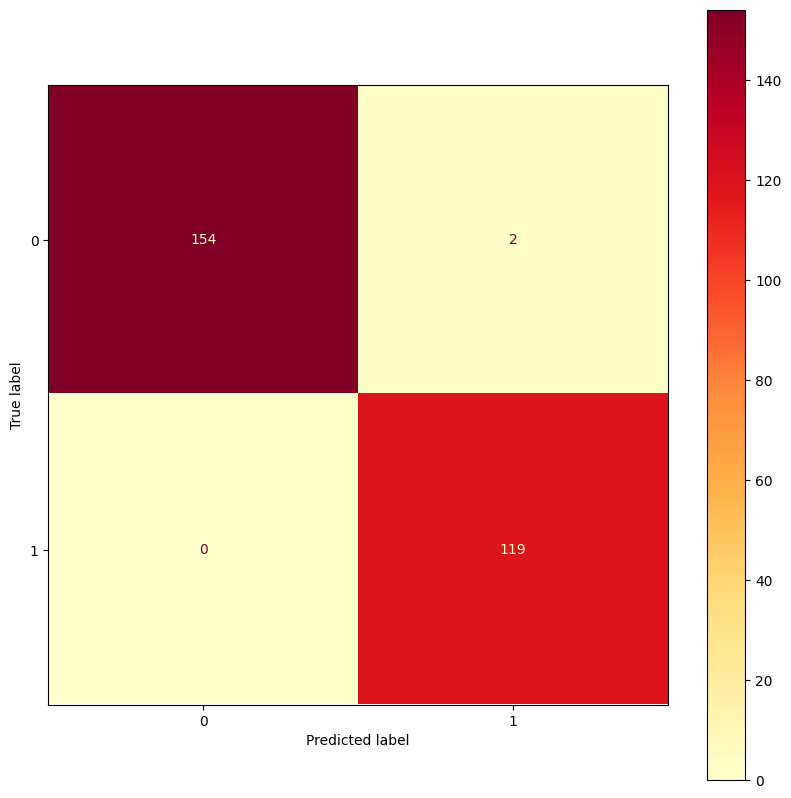

In [78]:
# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='YlOrRd')

## 8. Conclusion

# Both models are excellent at predicting wine quality

